<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DataMining_Dimensionality_Reduction/blob/master/Task%203/Databricks.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# Running Databricks code directly in Google Colab can be challenging because Databricks is a cloud-based
# platform designed to run on its own environment, integrating with Apache Spark. However, you can simulate
# a similar environment in Google Colab by installing and running PySpark, the Python API for Apache Spark,
# which includes MLlib for machine learning tasks like PCA.

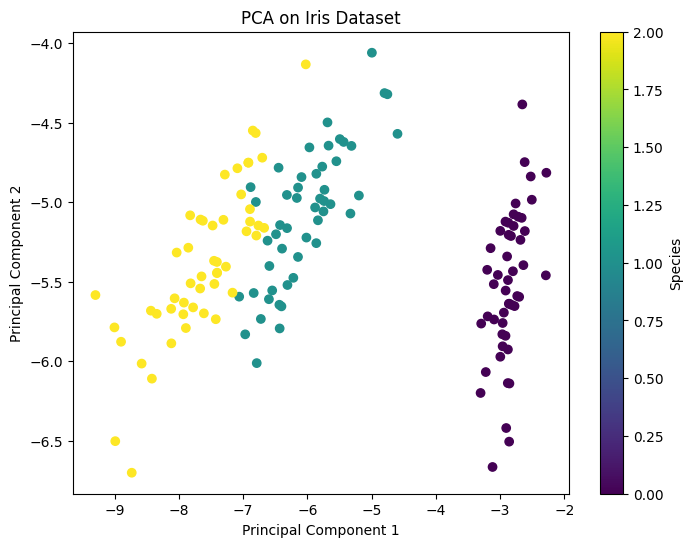

In [5]:
# Install PySpark
!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.ml.linalg import Vectors
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("PCA_Example").getOrCreate()

# Load the Iris dataset
iris_df = spark.createDataFrame(pd.read_csv('/content/iris_dataset.csv'))  # Replace with your CSV file path

# Select features and convert them into a single column of vectors (required for PCA)
assembler = VectorAssembler(inputCols=iris_df.columns[:-1], outputCol="features")
iris_features_df = assembler.transform(iris_df)

# Apply PCA
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
pca_model = pca.fit(iris_features_df)
iris_pca_df = pca_model.transform(iris_features_df)

# Convert to Pandas DataFrame for visualization
result_pdf = iris_pca_df.select("pcaFeatures").toPandas()

# Extract PCA features for plotting
result_pdf['pca1'] = result_pdf['pcaFeatures'].apply(lambda x: x[0])
result_pdf['pca2'] = result_pdf['pcaFeatures'].apply(lambda x: x[1])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(result_pdf['pca1'], result_pdf['pca2'], c=iris_df.toPandas()['species'].astype('category').cat.codes)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.colorbar(label='Species')
plt.show()

# Stop the Spark session
spark.stop()
